## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle

## Data Loading

In [3]:
os.listdir("input")

['Adolescent.csv', 'Adult.csv', 'Child.csv', 'Toddler.csv']

In [4]:
df=pd.read_csv(filepath_or_buffer="input/Toddler.csv")

In [5]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [6]:
print(df.shape)

(1054, 19)


## Data Preprocessing

In [7]:
print(df.columns)

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class'],
      dtype='object')


***dropping unwanted columns***

In [8]:
df=df.drop(labels=["Case_No","Ethnicity"],axis=1)

In [9]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,f,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,no,yes,family member,Yes


***renaming the columns***

In [10]:
df=df.rename(columns={"Qchat-10-Score":"Q_Score"})

In [11]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,f,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,no,yes,family member,Yes


***Visualizing Age_Mons Column***

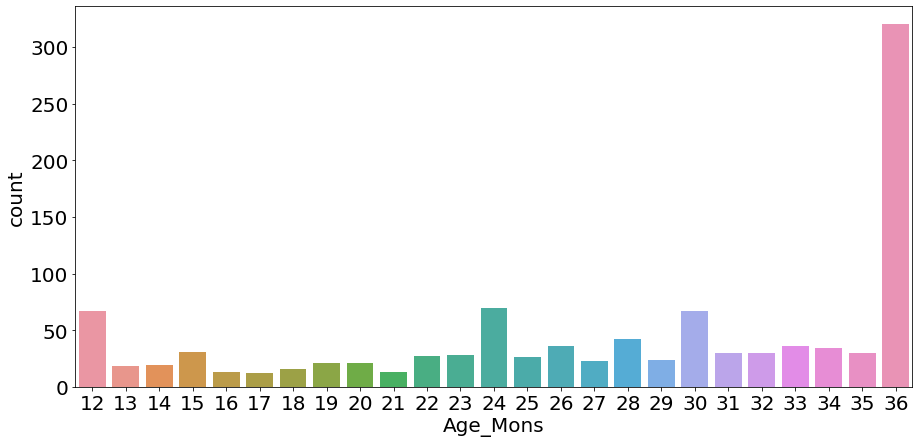

In [12]:
plt.figure(figsize=(15,7))
plt.rcParams["font.size"]=20
sns.countplot(x="Age_Mons",data=df)
plt.show()

***Visualizing Sex Column***

In [13]:
df["Sex"].value_counts()

m    735
f    319
Name: Sex, dtype: int64

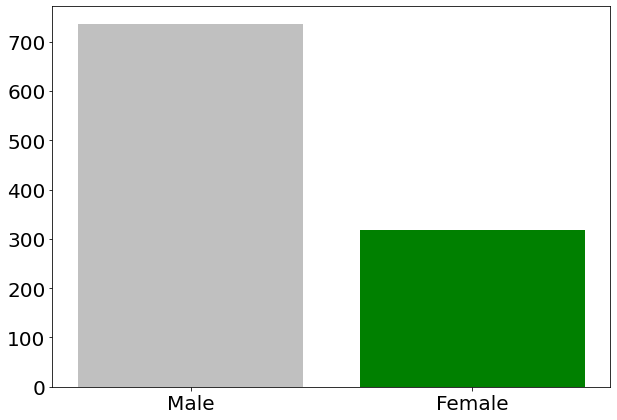

In [14]:
plt.figure(figsize=(10,7))
plt.rcParams["font.size"]=20
plt.bar(x=["Male","Female"],height=df["Sex"].value_counts(),color=["Silver","green"])
plt.show()

In [15]:
df["Sex"].replace(to_replace=["m","f"],value=[0,1],inplace=True)

In [16]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,0,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,0,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,0,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,1,no,yes,family member,Yes


***Visualizing Jaundice***

In [17]:
df["Jaundice"].unique()

array(['yes', 'no'], dtype=object)

In [18]:
df["Jaundice"].value_counts()

no     766
yes    288
Name: Jaundice, dtype: int64

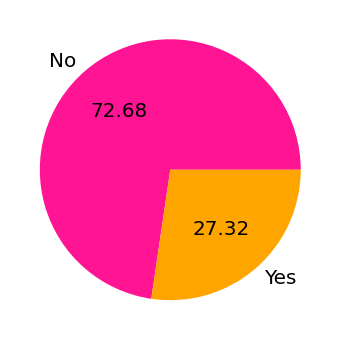

In [19]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
plt.pie(x=df["Jaundice"].value_counts(),labels=["No","Yes"],colors=["deeppink","orange"],autopct="%.2f")
plt.show()

In [20]:
df["Jaundice"].replace(to_replace=["no","yes"],value=[0,1],inplace=True)

In [21]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,yes,family member,Yes


***Visualizing Family_mem_with_ASD column***

In [22]:
df["Family_mem_with_ASD"].unique()

array(['no', 'yes'], dtype=object)

In [23]:
df["Family_mem_with_ASD"].value_counts()

no     884
yes    170
Name: Family_mem_with_ASD, dtype: int64

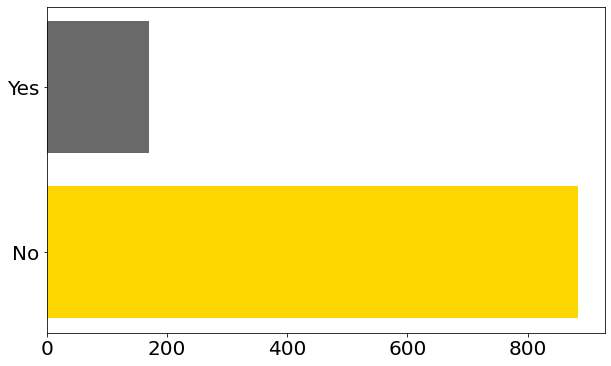

In [24]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
plt.barh(y=["No","Yes"],width=df["Family_mem_with_ASD"].value_counts(),color=["gold","dimgray"])
plt.show()

In [25]:
df["Family_mem_with_ASD"].replace(to_replace=["no","yes"],value=[0,1],inplace=True)

In [26]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,0,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,0,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,0,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,1,family member,Yes


***visualizing Who completed the test column***

In [27]:
df["Who completed the test"].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [28]:
df["Who completed the test"].replace(to_replace="Health care professional",value="Health Care Professional",inplace=True)

In [29]:
df["Who completed the test"].unique()

array(['family member', 'Health Care Professional', 'Self', 'Others'],
      dtype=object)

In [30]:
df["Who completed the test"].value_counts()

family member               1018
Health Care Professional      29
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

In [31]:
df["Who completed the test"].replace(to_replace=["family member","Health Care Professional","Self","Others"],value=[0,1,2,3],inplace=True)

In [32]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,0,0,No
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,0,0,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,0,0,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,0,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,1,0,Yes


***Analyzing and Visualizing Class column***

In [33]:
df["Class"].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
df["Class"].value_counts()

Yes    728
No     326
Name: Class, dtype: int64

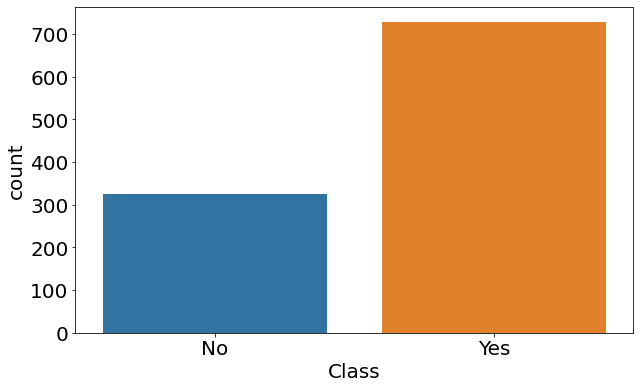

In [35]:
plt.figure(figsize=(10,6))
plt.rcParams["font.size"]=20
sns.countplot(x="Class",data=df)
plt.show()

In [36]:
df["Class"].replace(to_replace=["No","Yes"],value=[0,1],inplace=True)

In [37]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,0,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,0,0,1
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,1,0,1


In [38]:
df.to_csv("Usefull_Data/usefull_toddler.csv",index=False)

In [39]:
df.isnull().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Q_Score                   0
Sex                       0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class                     0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   A1                      1054 non-null   int64
 1   A2                      1054 non-null   int64
 2   A3                      1054 non-null   int64
 3   A4                      1054 non-null   int64
 4   A5                      1054 non-null   int64
 5   A6                      1054 non-null   int64
 6   A7                      1054 non-null   int64
 7   A8                      1054 non-null   int64
 8   A9                      1054 non-null   int64
 9   A10                     1054 non-null   int64
 10  Age_Mons                1054 non-null   int64
 11  Q_Score                 1054 non-null   int64
 12  Sex                     1054 non-null   int64
 13  Jaundice                1054 non-null   int64
 14  Family_mem_with_ASD     1054 non-null   int64
 15  Who completed the tes

In [41]:
X=df.drop(labels="Class",axis=1)
y=df["Class"]

In [42]:
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Q_Score,Sex,Jaundice,Family_mem_with_ASD,Who completed the test
0,0,0,0,0,0,0,1,1,0,1,28,3,1,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,0,1,0,0
2,1,0,0,0,0,0,1,1,0,1,36,4,0,1,0,0
3,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,1,0


In [43]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(843, 16) (211, 16) (843,) (211,)


## Model-1 Support Vector Classifier

In [46]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

In [47]:
svc_pred=svc_model.predict(X_test)

In [48]:
print(svc_pred)

[1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0]


## Result Analysis

***Accuracy Score***

In [49]:
svc_accuracy=accuracy_score(y_true=y_test,y_pred=svc_pred)
print("SupportVectorClassifier Accuracy is {:.2f}".format(svc_accuracy*100))

SupportVectorClassifier Accuracy is 100.00


***Classification Report***

In [50]:
print(classification_report(y_true=y_test,y_pred=svc_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        69
         Yes       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



***Confusion Matrix***

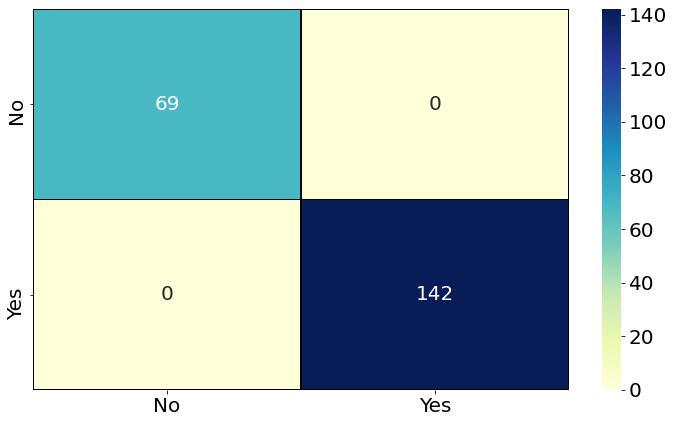

In [51]:
plt.figure(figsize=(12,7))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=svc_pred),annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="YlGnBu",linecolor="black",linewidths=0.2)
plt.show()

## Model Saving

In [52]:
with open(file="model/Toddler/SVM_model_toddler.pkl",mode="wb") as file:
    pickle.dump(obj=svc_model,file=file)

## Model-2 RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=600)
RF_model.fit(X=X_train,y=y_train)

RandomForestClassifier(n_estimators=600)

In [55]:
RF_pred=RF_model.predict(X=X_test)

In [56]:
print(RF_pred)

[1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0]


## Result Analysis

***Accuracy score***

In [57]:
RF_accuracy=accuracy_score(y_true=y_test,y_pred=RF_pred)
print("RandomForestClassifier accuracy is {:.2f}".format(RF_accuracy*100))

RandomForestClassifier accuracy is 100.00


***Classification report***

In [58]:
print(classification_report(y_true=y_test,y_pred=RF_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        69
         Yes       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



***Confusion Matrix***

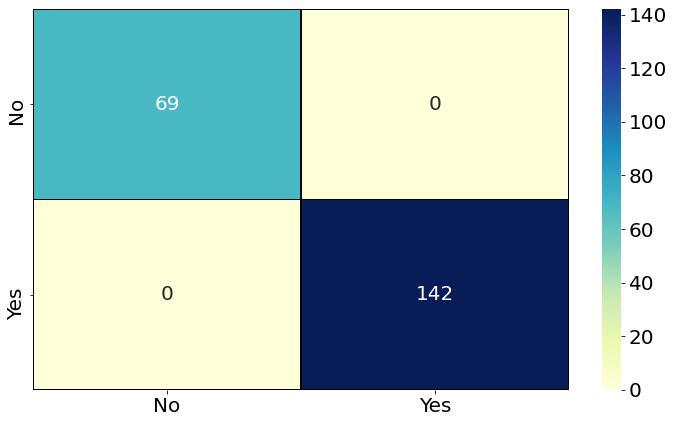

In [59]:
plt.figure(figsize=(12,7))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=RF_pred),annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="YlGnBu",linecolor="black",linewidths=0.2)
plt.show()

In [60]:
with open(file="model/Toddler/RF_model_toddler.pkl",mode="wb") as file:
    pickle.dump(obj=RF_model,file=file)

## Model-3 AdaBoostClassifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ABC_model=AdaBoostClassifier(n_estimators=600)
ABC_model.fit(X=X_train,y=y_train)

AdaBoostClassifier(n_estimators=600)

In [62]:
ABC_pred=ABC_model.predict(X=X_test)

In [63]:
print(ABC_pred)

[1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0]


### Result Analysis

***Accuracy Score***

In [64]:
ABC_accuracy=accuracy_score(y_true=y_test,y_pred=ABC_pred)
print("AdaBoostClassifier accuracy is {:.2f}".format(ABC_accuracy*100))

AdaBoostClassifier accuracy is 100.00


***Classification Report***

In [65]:
print(classification_report(y_true=y_test,y_pred=ABC_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        69
         Yes       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



***Confusion Matrix***

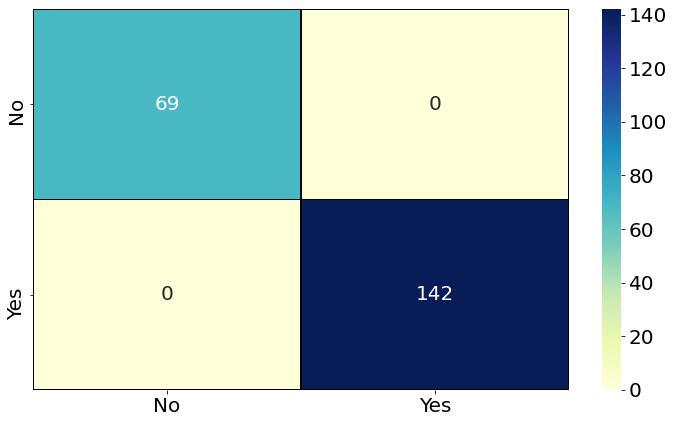

In [66]:
plt.figure(figsize=(12,7))
plt.rcParams["font.size"]=20
labels=["No","Yes"]
sns.heatmap(data=confusion_matrix(y_true=y_test,y_pred=ABC_pred),annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="YlGnBu",linecolor="black",linewidths=0.2)
plt.show()

In [67]:
with open(file="model/Toddler/ABC_model_toddler.pkl",mode="wb") as file:
    pickle.dump(obj=ABC_model,file=file)

## Model-4 ANN(Artificial Neural Network)

In [68]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import optimizers

In [72]:
hidden_units=100
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=10

In [73]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=16, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

In [74]:
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1700      
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,901
Trainable params: 11,901
Non-trainable params: 0
_________________________________________________________________


In [76]:
history=model.fit(x=X_train,y=y_train,epochs=no_epochs, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
27/27 [==============================] - 5s 30ms/step - loss: 0.4407 - accuracy: 0.7900 - val_loss: 0.2397 - val_accuracy: 0.9479
Epoch 2/10
27/27 [==============================] - 0s 10ms/step - loss: 0.1899 - accuracy: 0.9383 - val_loss: 0.1184 - val_accuracy: 0.9763
Epoch 3/10
27/27 [==============================] - 0s 8ms/step - loss: 0.1131 - accuracy: 0.9775 - val_loss: 0.0822 - val_accuracy: 0.9858
Epoch 4/10
27/27 [==============================] - 0s 8ms/step - loss: 0.0825 - accuracy: 0.9846 - val_loss: 0.0644 - val_accuracy: 0.9858
Epoch 5/10
27/27 [==============================] - 0s 8ms/step - loss: 0.0644 - accuracy: 0.9929 - val_loss: 0.0612 - val_accuracy: 0.9810
Epoch 6/10
27/27 [==============================] - 0s 7ms/step - loss: 0.0532 - accuracy: 0.9905 - val_loss: 0.0493 - val_accuracy: 0.9858
Epoch 7/10
27/27 [==============================] - 0s 7ms/step - loss: 0.0460 - accuracy: 0.9929 - val_loss: 0.0436 - val_accuracy: 0.9810
Epoch 8/10
27/27 [

## Model Accuracy and Loss Plot-Graphs

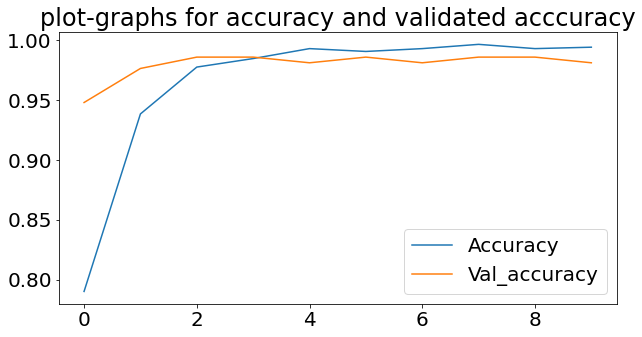

In [77]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title(label="plot-graphs for accuracy and validated acccuracy")
plt.legend(["Accuracy","Val_accuracy"])
plt.show()

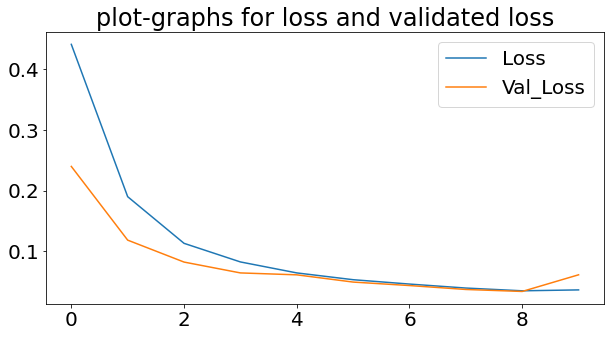

In [78]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title(label="plot-graphs for loss and validated loss")
plt.legend(["Loss","Val_Loss"])
plt.show()

## Model Saving

In [79]:
model.save("model/Toddler/ANN_model_toddler.h5")

In [80]:
ann_pred=model.predict(x=X_test,batch_size=10,verbose=1)

22/22 [==============================] - 1s 6ms/step


In [81]:
print(ann_pred)

[[9.99559641e-01]
 [1.44522697e-01]
 [1.08331442e-03]
 [9.96585608e-01]
 [6.68004632e-01]
 [6.86501153e-05]
 [9.99914408e-01]
 [2.26417184e-03]
 [9.99924779e-01]
 [8.50356228e-05]
 [9.99543309e-01]
 [4.84637803e-06]
 [4.05013861e-06]
 [3.65153164e-06]
 [9.99723434e-01]
 [9.99687314e-01]
 [8.77884209e-01]
 [9.99624372e-01]
 [9.99835014e-01]
 [9.99748230e-01]
 [9.99917388e-01]
 [1.37369516e-05]
 [9.99760032e-01]
 [9.99528289e-01]
 [5.40629029e-03]
 [9.99901354e-01]
 [9.98526394e-01]
 [9.98414874e-01]
 [9.99389887e-01]
 [9.92310464e-01]
 [9.99852300e-01]
 [7.02527759e-05]
 [9.99933243e-01]
 [9.99882936e-01]
 [9.69296932e-01]
 [9.99094248e-01]
 [9.72581625e-01]
 [9.99356627e-01]
 [9.99656677e-01]
 [9.99657869e-01]
 [1.10772252e-03]
 [9.99942183e-01]
 [9.98796463e-01]
 [9.89079893e-01]
 [2.51127472e-06]
 [1.26063824e-04]
 [9.99510288e-01]
 [2.59561239e-05]
 [9.90431488e-01]
 [9.99078751e-01]
 [9.96930480e-01]
 [9.98819113e-01]
 [3.61105800e-03]
 [9.99717593e-01]
 [9.92978811e-01]
 [9.983192

In [82]:
rounded = [int(round(x[0])) for x in ann_pred]
print(rounded)

[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]


In [83]:
y_true=list(y_test)

In [84]:
print(y_true)

[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]


## Result Analysis

***Accuracy Score***

In [85]:
ann_accuracy=accuracy_score(y_true=y_true,y_pred=rounded)
print("ANN Accuracy is {:.2f}".format(ann_accuracy*100))

ANN Accuracy is 98.10


## Accuracy Comparision for Toddler Dataset

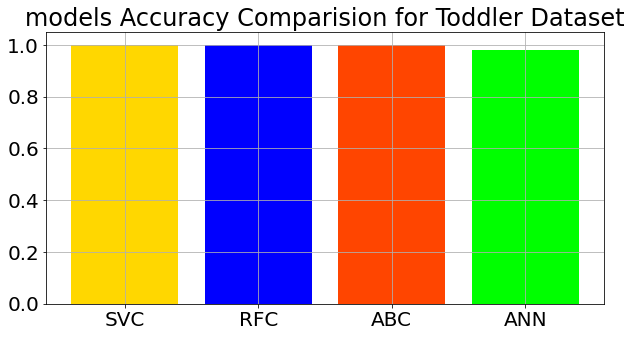

In [86]:
data=[svc_accuracy,RF_accuracy,ABC_accuracy,ann_accuracy]
labels=["SVC","RFC","ABC","ANN"]
colors=["gold","blue","orangered","lime"]
plt.figure(figsize=(10,5))
plt.grid()
plt.bar(x=labels,height=data,color=colors)
plt.title(label="models Accuracy Comparision for Toddler Dataset")
plt.show()

## Thank You